<a href="https://colab.research.google.com/github/haosulab/ManiSkill2/blob/dev/examples/tutorials/1_quickstart.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setup Code

To begin, prepare the colab environment by clicking the play button below and make sure you are using a GPU runtime. This will install all dependencies for the future code. ManiSkill is as simple as `pip install mani_skill` and is lightweight and fast to get started with.

In [1]:
!mkdir -p /usr/share/vulkan/icd.d
!wget -q https://raw.githubusercontent.com/haosulab/ManiSkill2/main/docker/nvidia_icd.json
!wget -q https://raw.githubusercontent.com/haosulab/ManiSkill2/main/docker/10_nvidia.json
!mv nvidia_icd.json /usr/share/vulkan/icd.d
!mv 10_nvidia.json /usr/share/glvnd/egl_vendor.d/10_nvidia.json
# dependencies
!apt-get install -y --no-install-recommends libvulkan-dev

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  libvulkan1
Recommended packages:
  mesa-vulkan-drivers | vulkan-icd
The following NEW packages will be installed:
  libvulkan-dev libvulkan1
0 upgraded, 2 newly installed, 0 to remove and 38 not upgraded.
Need to get 1,020 kB of archives.
After this operation, 17.2 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/main amd64 libvulkan1 amd64 1.3.204.1-2 [128 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/main amd64 libvulkan-dev amd64 1.3.204.1-2 [892 kB]
Fetched 1,020 kB in 1s (1,952 kB/s)
Selecting previously unselected package libvulkan1:amd64.
(Reading database ... 121752 files and directories currently installed.)
Preparing to unpack .../libvulkan1_1.3.204.1-2_amd64.deb ...
Unpacking libvulkan1:amd64 (1.3.204.1-2) ...
Selecting previously unselected package libvulkan-dev:amd64.
Preparing to un

In [2]:
!git clone https://github.com/haosulab/ManiSkill2 --branch dev --single-branch

Cloning into 'ManiSkill2'...
remote: Enumerating objects: 5065, done.
remote: Counting objects: 100% (1599/1599), done.
remote: Compressing objects: 100% (647/647), done.
remote: Total 5065 (delta 1214), reused 1064 (delta 951), pack-reused 3466
Receiving objects: 100% (5065/5065), 409.82 MiB | 30.68 MiB/s, done.
Resolving deltas: 100% (2959/2959), done.
Updating files: 100% (785/785), done.


In [3]:
!pip install -e ManiSkill2

Obtaining file:///content/ManiSkill2
  Installing build dependencies ... done
  Checking if build backend supports build_editable ... done
  Getting requirements to build editable ... done
  Installing backend dependencies ... done
  Preparing editable metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 953.9/953.9 kB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.1/50.1 MB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 195.4/195.4 kB 18.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 28.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 689.5/689.5 kB 59.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 535.2/535.2 kB 50.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 49.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 704.6/704.6 kB 61.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 638.2/638.2 

In [4]:
try:
    import google.colab
    IN_COLAB = True
except:
    IN_COLAB = False

if IN_COLAB:
    import site
    site.main() # run this so local pip installs are recognized

# Tutorial on ManiSkill Environments and Working with Demonstrations


ManiSkill is a feature-rich GPU-accelerated robotics benchmark built on top of [SAPIEN](https://github.com/haosulab/sapien) designed to provide accessible support for a wide array of applications from robot learning, learning from demonstrations, sim2real/real2sim, and more.

Features:

* GPU parallelized simulation enabling 250,000+ FPS on some tasks
* GPU parallelized rendering enabling 15,000+ FPS on some tasks, massively outperforming other simulators
* Flexible API to build custom tasks
* Variety of verified robotics tasks with diverse dynamics and visuals, from dexterous hands to low-level mobile manipulation
* Reproducible baselines in Reinforcement Learning and Learning from Demonstrations



This notebook goes over how to create and configure environments as well as work with our demonstration dataset. Our [ManiSkill](https://github.com/haosulab/ManiSkill) environments follow the gym interface with various robotics related customizations and demonstration dataset that enable research into different areas such as robotics, computer vision, and reinforcement learning. The environments are built on top of the [Sapien](sapien.ucsd.edu/) simulation environment.
`
For those interested in visual Reinforcement Learning and Imitation Learning workflows that leverage the fast visual simulation, we have provided a tutorial for each of those [here](https://github.com/haosulab/ManiSkill2/tree/main/examples/tutorials)

This tutorial will work with the PickCube environment, a simple but also commonplace robotics task.

In [5]:
# Import required packages
import gymnasium as gym
from tqdm.notebook import tqdm
import numpy as np
import mani_skill.envs
import matplotlib.pyplot as plt

/usr/local/lib/python3.10/dist-packages/sapien/wrapper/pinocchio_model.py:281: UserWarning: pinnochio package is not installed, fallback to built-in pinocchio
  warnings.warn(


## 1 Create and configure environments

We can create ManiSkill environments by specifying a environment id. Further, observations, actions, and rewards are configurable with just a few lines of code

Action Space: Box(-1.0, 1.0, (8,), float32)


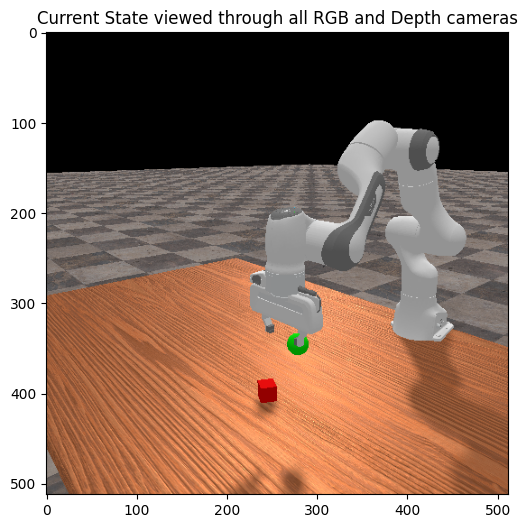

In [38]:
#@title 1.1 Choose an environment, observation mode, control mode, and reward
#@markdown Run this cell to display the action space of the chosen controller as well as the current view of the environment.
#@markdown The main part of the view is our view of the environment. The two views on the right are the RGB and Depth images from a third-person camera
#@markdown and a hand-mounted camera. The two views on the right are also the exact perspectives and orientations the robot gets in the rgbd and point cloud observation modes

# Can be any env_id from the list of Rigid-Body envs: https://haosulab.github.io/ManiSkill2/concepts/environments.html#rigid-body
# and Soft-Body envs: https://haosulab.github.io/ManiSkill2/concepts/environments.html#soft-body

# This tutorial allows you to play with 4 environments out of a total of 20 environments that ManiSkill provides
env_id = "PickCube-v1" #@param ['PickCube-v1', 'PegInsertionSide-v1', 'StackCube-v1']

# choose an observation type and space, see https://haosulab.github.io/ManiSkill2/concepts/observation.html for details
obs_mode = "rgbd" #@param can be one of ['pointcloud', 'rgbd', 'state_dict', 'state']

# choose a controller type / action space, see https://haosulab.github.io/ManiSkill2/concepts/controllers.html for a full list
control_mode = "pd_joint_delta_pos" #@param can be one of ['pd_ee_delta_pose', 'pd_ee_delta_pos', 'pd_joint_delta_pos', 'arm_pd_joint_pos_vel']

reward_mode = "dense" #@param can be one of ['sparse', 'dense']

# create an environment with our configs and then reset to a clean state
env = gym.make(env_id,
               obs_mode=obs_mode,
               reward_mode=reward_mode,
               control_mode=control_mode,
               enable_shadow=True)
obs, _ = env.reset()
print("Action Space:", env.action_space)

# take a look at the current state
img = env.unwrapped.render_rgb_array()[0]
plt.figure(figsize=(10,6))
plt.title("Current State viewed through all RGB and Depth cameras")
plt.imshow(img)
env.close()

In [7]:
# some visualization functions for different observation modes
def show_camera_view(obs_camera, title):
    plt.figure()
    rgb, depth = obs_camera['rgb'], obs_camera['depth']
    plt.subplot(1,2,1)
    plt.title(f"{title} - RGB")
    plt.imshow(rgb)
    plt.subplot(1,2,2)
    plt.title(f"{title} - Depth")
    plt.imshow(depth[:,:, 0], cmap="gray")

def show_pointcloud(obs):
    import trimesh
    v = obs['pointcloud']['xyzw'][::,:3]
    cam2world = obs["sensor_param"]["base_camera"]["cam2world_gl"]
    camera = trimesh.scene.Camera("camera", (1024, 1024), fov=(np.rad2deg(np.pi/2), np.rad2deg(np.pi/2)))
    s= trimesh.Scene([trimesh.points.PointCloud(v, obs['pointcloud']['rgb'])], camera=camera, camera_transform=cam2world)
    return s.show()

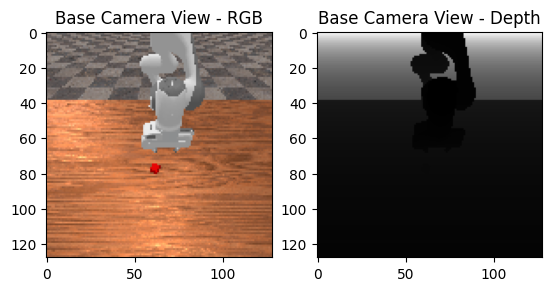

In [8]:
#@markdown Display the RGBD observation. Make sure you are using `obs_mode="rgbd"`
show_camera_view(obs['sensor_data']['base_camera'], "Base Camera View")

In [ ]:
#@markdown Display the Pointcloud observation. Make sure you are using `obs_mode="pointcloud"`
show_pointcloud(obs)

### 1.2 Interactive Viewer and Recording videos

To create a replay video of what happened in an episode, we can use the `RecordEpisode` environment wrapper shown below, and specify what we want to record. Note that recording replay videos adds some overhead so ensure you don't use this while training. You can also directly save rendered frames which is shown in Section 2.2.

`RecordEpisode` will always use what the `render_mode` specified at environment creation is, and in the code below we use "rgb_array" as shown earlier.

ManiSkill has an interactive viewer, available if you run locally on a machine with a GUI. You can render the current state with `env.human_render()` which will bring up a viewer. The script below will show the interactive viewer if it detects that it is not running in Colab.

In [9]:
from mani_skill.utils.wrappers import RecordEpisode
# to make it look a little more realistic, we will enable shadows which make the default lighting cast shadows
env = gym.make(env_id, render_mode="rgb_array", enable_shadow=True)
env = RecordEpisode(
    env,
    "./videos", # the directory to save replay videos and trajectories to
    info_on_video=True # when True, will add informative text onto the replay video such as step counter, reward, and other metrics
)

# step through the environment with random actions
obs, _ = env.reset()
for i in tqdm(range(100)):
    action = env.action_space.sample()
    obs, reward, terminated, truncated, info = env.step(action)
    if not IN_COLAB: env.human_render() # will render with a window if possible
env.flush_video() # Save the video
env.close()
from IPython.display import Video
Video("./videos/0.mp4", embed=True) # Watch our replay

/usr/local/lib/python3.10/dist-packages/gymnasium/core.py:311: UserWarning: WARN: env.max_episode_steps to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.max_episode_steps` for environment variables or `env.get_wrapper_attr('max_episode_steps')` that will search the reminding wrappers.
  logger.warn(


  0%|          | 0/100 [00:00<?, ?it/s]

To interactively control the robot, we provide a simple GUI-based tele-operation tool that lets you move the robot's end-effector around, toggle grasping, and make it follow your commands to solve tasks. A video demonstrating how it works is shown below for the `StackCube-v1` task.

In [ ]:
!python -m mani_skill.examples.teleoperation.interactive_panda -e "StackCube-v1"

In [ ]:
%%html
<video controls width=800>
<source src="https://github.com/haosulab/ManiSkill2/raw/dev/docs/source/_static/videos/teleop-stackcube-demo.mp4">
</video>

# Demonstration Data

Managing and collecting/generating trajectory data is central to ManiSkill. This section will cover both how to load existing trajectory data as well as tools helpful for getting more data.

### 2.1 Download and load

We provide a simple command line tool to download demos. Specify an output folder and environment ID and it will download the appropriate demonstrations open sourced at https://huggingface.co/datasets/haosulab/ManiSkill. There are various tele-operated/motionplanning/policy-generated demonstrations. Furthermore when downloaded, there will be sample videos of the demonstration that show what the demonstration looks like. We first download the demonstration dataset below. By default it saves to `~/.maniskill/demos` but here we save to the local demos folder.

In [13]:
!python -m mani_skill.utils.download_demo "StackCube-v1" -o "demos"

106kit [00:00, 915kit/s]               
500kit [00:00, 1.95Mit/s]      
8.19kit [00:00, 107kit/s]


To load the demonstration dataset, you can follow the dataset code at https://github.com/haosulab/ManiSkill2/blob/dev/mani_skill/trajectory/dataset.py which is a simple PyTorch dataset style approach that should be able to load just about any ManiSkill dataset.



In [78]:
from mani_skill.trajectory.dataset import ManiSkillTrajectoryDataset
dataset = ManiSkillTrajectoryDataset(dataset_file="demos/StackCube-v1/teleop/trajectory.h5")
data = dataset[150]
for k, v in data.items():
    print(k, v)

100%|██████████| 10/10 [00:00<00:00, 153.29it/s]

obs {}
action tensor([ 0.2050,  0.5364, -0.0224, -1.9724,  0.0655,  2.5328,  1.1227,  1.0000])
terminated True
truncated True
reward 1.0
success True


Alternatively you can load the raw data yourself via h5py and a load_json utility:

In [43]:
import h5py
from mani_skill.utils.io_utils import load_json

# Load the trajectory data from the .h5 file. Demonstrations are versioned and thus saved to "demos/<version>/..."
traj_path = f"demos/StackCube-v1/teleop/trajectory.h5"
# You can also replace the above path with the trajectory you just recorded (./tmp/trajectory.h5)
h5_file = h5py.File(traj_path, "r")

# Load associated json
json_path = traj_path.replace(".h5", ".json")
json_data = load_json(json_path)

episodes = json_data["episodes"] # meta data of each episode
env_info = json_data["env_info"]
env_id = env_info["env_id"]
env_kwargs = env_info["env_kwargs"]

print("env_id:", env_id)
print("env_kwargs:", env_kwargs)
print("#episodes:", len(episodes))

env_id: StackCube-v1
env_kwargs: {'obs_mode': 'none', 'control_mode': 'pd_joint_pos', 'render_mode': 'rgb_array', 'reward_mode': 'sparse'}
#episodes: 10


The trajectory of each episode is stored under the `traj_{episode_id}` key in the HDF5 file. `episode_id` usually ranges from 0 to `len(episodes) - 1`.
`episode_id` and other meta information of episdoes are stored under the `episodes` key in the JSON file.

The raw trajectory always contains the keys: `actions`, `env_states`, `terminated`, and `truncated`. The trajectory may optionally include `success`, `fail` and `reward`. Success and fail are included if the task the trajectory is from has success/failure conditions in its evaluation.

In [44]:
traj_id = "traj_0"
traj_h5 = h5_file[traj_id]
def print_h5py_structure(traj_h5, prefix=""):
    for key in traj_h5:
        if isinstance(traj_h5[key], h5py.Group):
            print_h5py_structure(traj_h5[key], prefix=prefix + "/" + key)
        else:
            print(prefix + "/" + key, traj_h5[key].shape, traj_h5[key].dtype)

print_h5py_structure(traj_h5)

/actions (154, 8) float32
/terminated (154,) bool
/truncated (154,) bool
/success (154,) bool
/env_states/actors/table-workspace (155, 13) float32
/env_states/actors/cubeA (155, 13) float32
/env_states/actors/cubeB (155, 13) float32
/env_states/articulations/panda (155, 31) float32
/rewards (154,) float32


Some data are more nested such as `env_states`, which is a nested dictionary (easier to hack with/use in other environments). In order to be efficient, it is stored as a nested dictionary of arrays. We provide some simple tools to convert it to a list of dictionaries or to just simply select a single element below. These can be useful if you wish to e.g. set environment state (demonstrated in section 2.2)

In [45]:
from mani_skill.trajectory.utils import index_dict, dict_to_list_of_dicts
index_dict(traj_h5["env_states"], 23) # select the 23rd element of all values

{'actors': {'table-workspace': array([-0.12     ,  0.       , -0.9196429,  0.7071068,  0.       ,
          0.       ,  0.7071068,  0.       ,  0.       ,  0.       ,
          0.       ,  0.       ,  0.       ], dtype=float32),
  'cubeA': array([-8.3306596e-02, -9.3059219e-02,  2.0001212e-02,  1.3895565e-01,
          3.4101377e-06, -1.0061878e-05,  9.9029869e-01,  0.0000000e+00,
          0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
          0.0000000e+00], dtype=float32),
  'cubeB': array([-3.9263811e-02,  1.0727604e-01,  2.0000963e-02,  3.0388102e-01,
          3.7140439e-06,  2.0803016e-06,  9.5271003e-01,  0.0000000e+00,
          0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
          0.0000000e+00], dtype=float32)},
 'articulations': {'panda': array([-6.1500001e-01,  7.2759576e-11, -1.4901161e-08,  1.0000001e+00,
          0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
          0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  

In [46]:
env_states = dict_to_list_of_dicts(traj_h5["env_states"]) # convert to a list of dictionaries
env_states[23]

{'actors': {'table-workspace': array([-0.12     ,  0.       , -0.9196429,  0.7071068,  0.       ,
          0.       ,  0.7071068,  0.       ,  0.       ,  0.       ,
          0.       ,  0.       ,  0.       ], dtype=float32),
  'cubeA': array([-8.3306596e-02, -9.3059219e-02,  2.0001212e-02,  1.3895565e-01,
          3.4101377e-06, -1.0061878e-05,  9.9029869e-01,  0.0000000e+00,
          0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
          0.0000000e+00], dtype=float32),
  'cubeB': array([-3.9263811e-02,  1.0727604e-01,  2.0000963e-02,  3.0388102e-01,
          3.7140439e-06,  2.0803016e-06,  9.5271003e-01,  0.0000000e+00,
          0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
          0.0000000e+00], dtype=float32)},
 'articulations': {'panda': array([-6.1500001e-01,  7.2759576e-11, -1.4901161e-08,  1.0000001e+00,
          0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
          0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  

**Note that the raw trajectories often do not include actual observations.** We store both actions and environment states, which can be used to replay trajectories and generate desired observations (states, RGBD images, point cloud etc.). Please see the following sections for how to replay and convert demonstrations to your desired observation and action spaces.

### 2.2 Replay demonstrations

To replay the trajectory of an episode, you need to first create an environment given the environment initialization keyword arguments stored in the JSON file. Additionally, you need to reset the environment with the same seed and other keyword arguments of the episode recorded in the JSON file. Then, the trajectory can be replayed by actions or environment states stored in the HDF5 file.

In [53]:
from mani_skill.utils.visualization.misc import images_to_video
def replay(episode_idx, h5_file, json_data, render_mode="cameras", fps=20):
    episodes = json_data["episodes"]
    ep = episodes[episode_idx]
    # episode_id should be the same as episode_idx, unless specified otherwise
    episode_id = ep["episode_id"]
    traj = h5_file[f"traj_{episode_id}"]
    env_states = dict_to_list_of_dicts(traj["env_states"])

    # Create the environment
    env_kwargs = json_data["env_info"]["env_kwargs"]
    env = gym.make(json_data["env_info"]["env_id"], **env_kwargs)
    # Reset the environment
    reset_kwargs = ep["reset_kwargs"].copy()
    reset_kwargs["seed"] = ep["episode_seed"]
    env.reset(**reset_kwargs)

    frames = [env.render_rgb_array()[0].numpy()]
    for i in tqdm(range(len(traj["actions"]))):
        action = traj["actions"][i]
        obs, reward, terminated, truncated, info = env.step(action)
        env.set_state_dict(env_states[i])
        if not IN_COLAB: env.human_render()
        frames.append(env.render_rgb_array()[0].numpy())

    env.close()
    del env
    images_to_video(frames, output_dir=".", video_name="replay", fps=30, )

In [56]:
#@markdown Choose an episode ID here and run this cell to watch a replay of a expert demo. Note that this can be a little slow as this code generates a video. To run faster we recommend watching on a machine with a GUI and running only the replay function.

episode_idx = 9 #@param {type:"integer"}
replay(episode_idx, h5_file, json_data)
from IPython.display import Video
Video("./replay.mp4", embed=True)

  0%|          | 0/137 [00:00<?, ?it/s]

Video created: ./replay.mp4


100%|██████████| 138/138 [00:01<00:00, 75.80it/s]


### 2.3 Convert demonstrations across observation/action spaces

The demonstration dataset does not include actual observations in order to save space. You can convert trajectories to the desired observation space and action space and specify the number of parallel processes to run to speed this up.

The command below will generate the file `demos/StackCube-v1/teleop/trajectory.rgbd.pd_ee_delta_pose.h5` and its associated json metadata file. In general, generating trajectories like this will separate them based on the file name, which specifies the observation mode and control mode.

In [ ]:
!python -m mani_skill.trajectory.replay_trajectory --traj-path \
 demos/StackCube-v1/teleop/trajectory.h5 --save-traj --obs-mode rgbd --num-procs 2

We can load the converted dataset and now look at the new RGBD data added into it

100%|██████████| 10/10 [00:02<00:00,  4.63it/s]


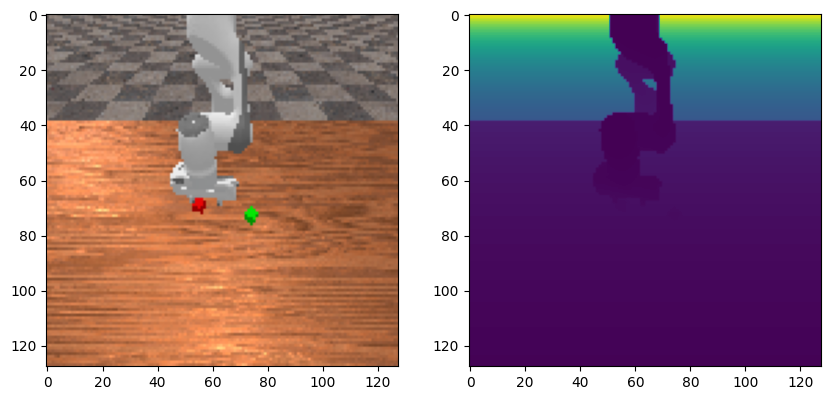

In [86]:
from mani_skill.trajectory.dataset import ManiSkillTrajectoryDataset
dataset = ManiSkillTrajectoryDataset(dataset_file="demos/StackCube-v1/teleop/trajectory.rgbd.pd_joint_pos.h5")
data = dataset[23]
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].imshow(data["obs"]["sensor_data"]["base_camera"]["rgb"])
axs[1].imshow(data["obs"]["sensor_data"]["base_camera"]["depth"])